# Exploratory Data Analysis with the Kaggle TMDB Dataset

Download the source file:  https://www.kaggle.com/tmdb/tmdb-movie-metadata/downloads/tmdb-5000-movie-dataset.zip/2

## First things first

Let's import pandas as pd, and seaborn as sns.

In [5]:
import pandas as pd
import seaborn as sns

Oops, looks like seaborn isn't installed yet?  Let's look at two ways to fix this (one obvious, one less obvious).

In [ ]:
!pip install seaborn

Unzip the data file downloaded from the above link.  Then read the csv file named `tmdb_5000_movies.csv` into a pandas dataframe called `df`.

In [6]:
df = pd.read_csv("tmdb_5000_movies.csv")

Print the shape of the dataframe.

In [7]:
print(df.shape)

(4803, 20)


Display the head of the dataframe.  (This works better if you **don't** put it inside of a print statement).

In [ ]:
df.head(3)

Print the column labels of the dataframe.

In [9]:
print(df.columns.tolist())

['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language', 'original_title', 'overview', 'popularity', 'production_companies', 'production_countries', 'release_date', 'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title', 'vote_average', 'vote_count']


## Exploratory Analysis
This dataframe contains some pretty complex data types in the various columns.  Let's explore this a little bit.

Write a line of code prints the first row of the column "genres".  What is the type of this data?

In [10]:
df.loc[0, 'genres']

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

### Using the built-in `describe()` method

Use the dataframe's `describe()` method to quickly summarize statistics of the numeric columns.  Store the result of calling this method in a new variable called `desc`.

In [11]:
desc = df.describe()
desc

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


Of what type is `desc`?

In [12]:
type(desc)

pandas.core.frame.DataFrame

Using what you know about objects of this type, determine programmatically the number of numeric columns in the original dataframe.

In [14]:
desc.shape[1]

7

Does the mean or standard deviation "make sense" for every column in `desc`?  (Use common sense and your best judgement in interpreting what the columns represent).

In [16]:
desc

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


Challenge question:  can you use `for` loop to create a new list containing the non-numeric columns of `df`?

## Finding interesting rows (movies)

We used the `describe()` method to generate simple statistics for each column.  But what if we wanted to know more specific information like:  "What movie had the highest budget"?  We can use the `df.sort_values` method to sort the dataframe by the values of a specific column.  See if you can use the `help` for this method to sort the rows from highest to lowest budget.

In [22]:
df_sorted = df.sort_values('budget', ascending=False)
df_sorted.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
17,380000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 28, ""...",http://disney.go.com/pirates/index-on-stranger...,1865,"[{""id"": 658, ""name"": ""sea""}, {""id"": 1316, ""nam...",en,Pirates of the Caribbean: On Stranger Tides,Captain Jack Sparrow crosses paths with a woma...,135.413856,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2011-05-14,1045713802,136.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Live Forever Or Die Trying.,Pirates of the Caribbean: On Stranger Tides,6.4,4948
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
7,280000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://marvel.com/movies/movie/193/avengers_ag...,99861,"[{""id"": 8828, ""name"": ""marvel comic""}, {""id"": ...",en,Avengers: Age of Ultron,When Tony Stark tries to jumpstart a dormant p...,134.279229,"[{""name"": ""Marvel Studios"", ""id"": 420}, {""name...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2015-04-22,1405403694,141.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,A New Age Has Come.,Avengers: Age of Ultron,7.3,6767


Create a new dataframe with the top 3 movies in terms of budgets, with the columns "title" and "budget".

In [28]:
df[['title', 'budget']].sort_values('budget', ascending=False).iloc[:3, :]

,title,budget
17,Pirates of the Caribbean: On Stranger Tides,380000000
1,Pirates of the Caribbean: At World's End,300000000
7,Avengers: Age of Ultron,280000000


In [31]:
df_sorted.head(3)[['title', 'budget']]

,title,budget
17,Pirates of the Caribbean: On Stranger Tides,380000000
1,Pirates of the Caribbean: At World's End,300000000
7,Avengers: Age of Ultron,280000000


Which 3 movies had the highest revenues?  Are they the same movies as above?

## Visualizing distributions of numeric columns

In [32]:
# You need this "magic" function to enable plotting in the notebook.
%matplotlib inline

The simplest way to visualize a distribution of values is using a histogram.  Pandas dataframes have a handy built-in method that helps you calculate and visualize historgrams.

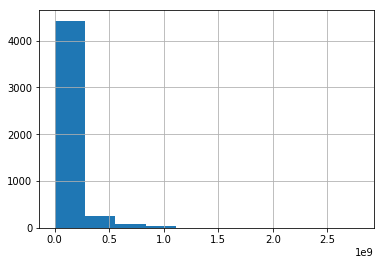

In [35]:
_ = df['revenue'].hist()

Create a histogram of the "budget" column.  The "ax" indicates that this method returns something called an "axis" handle that we can use to modify the plot.

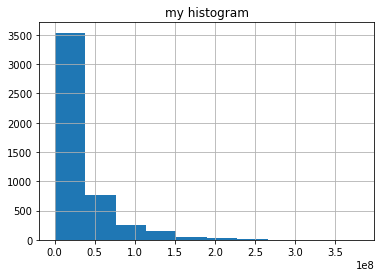

In [38]:
ax = df['budget'].hist()
ax = ax.set_title('my histogram')

Let's make the chart a little bigger and give it a title.  (This code pattern might look strange, but it's one you can just repeat from examples when doing this on your own!)

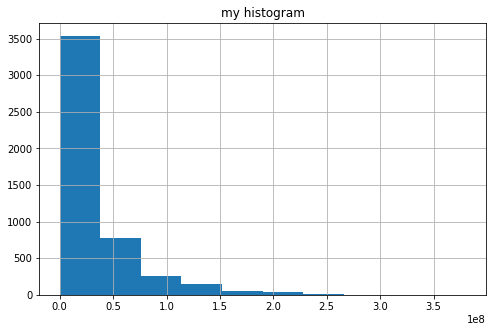

In [39]:
ax = df['budget'].hist(figsize=(8,5))
ax = ax.set_title('my histogram')

Use the `help` information about `df.hist` to figure out how to use 20 bins instead of the default.

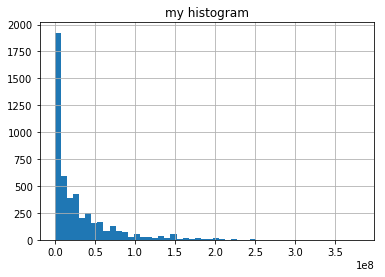

In [41]:
ax = df['budget'].hist(bins=50)
ax = ax.set_title('my histogram')

## Visualizing relationships between numeric columns
One of the first questions that pops to mind is about correlations between numeric variables.  "Are movies with the highest budget also the most popular?  Most profitable? Etc..."

One of the simplest things we can do is to calculate correlations between variables using the built-in `corr()` method.

In [42]:
df.corr()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
budget,1.000000,-0.089377,0.505414,0.730823,0.269851,0.093146,0.593180
id,-0.089377,1.000000,0.031202,-0.050425,-0.153536,-0.270595,-0.004128
popularity,0.505414,0.031202,1.000000,0.644724,0.225502,0.273952,0.778130
revenue,0.730823,-0.050425,0.644724,1.000000,0.251093,0.197150,0.781487
runtime,0.269851,-0.153536,0.225502,0.251093,1.000000,0.375046,0.271944
vote_average,0.093146,-0.270595,0.273952,0.197150,0.375046,1.000000,0.312997
vote_count,0.593180,-0.004128,0.778130,0.781487,0.271944,0.312997,1.000000


Identify a pair of highly correlated variables and create a scatter plot showing their relationship.

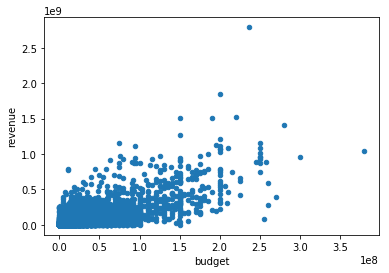

In [43]:
ax = df.plot(kind='scatter', x='budget', y='revenue')

You can use the `alpha` optional argument to plot to change marker transparency.  `alpha` must be between 0 (perfectly transparent) to 1 (perfectly opaque).

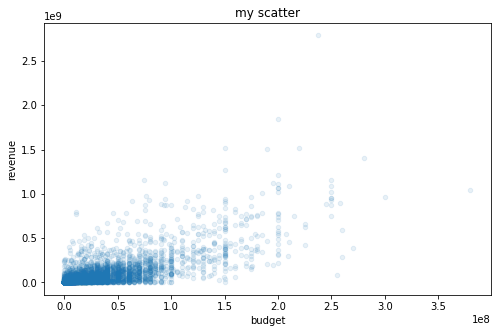

In [45]:
ax = df.plot(kind='scatter', x='budget', y='revenue', alpha=0.1,
             title='my scatter', figsize=(8,5))

Now do the same thing for two uncorrelated variables.  What pattern do you expect to see in the scatter chart?

## Visualizing non-numeric columns

Visualizing non-numeric data is generally a bit more challenging than numeric data.  But we can do some simple things "out of the box" with pandas.

For example, how many unique languages are there in the dataframe?

We can use this trick to get all unique languages in this column:  `list(set(<column data>))`

Even better, we'll use the `groupby` method to count how many there are of each.

Now we have numeric data we can plot.  Let's try using a barplot here.